<a href="https://colab.research.google.com/github/denmj/kaggle/blob/master/WiDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [489]:

import sys

# Working with data 
import pandas as pd

# Vizualization 
import matplotlib

# math and stat lib
import numpy as np
import scipy as sp

import IPython
from IPython import display
import sklearn 
import random
import time

import warnings
warnings.filterwarnings('ignore')

In [490]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier


#Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import category_encoders as ce
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

import plotly.graph_objects as go 
import plotly.express as px 


#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [491]:
pd.set_option('display.max_rows', 500)


In [492]:
data_dict = pd.read_csv('/content/DataDictionaryWiDS2021.csv')

train_set = pd.read_csv('/content/TrainingWiDS2021.csv')
test_set = pd.read_csv('/content/UnlabeledWiDS2021.csv')

In [493]:
train_set.info(), test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130157 entries, 0 to 130156
Columns: 181 entries, Unnamed: 0 to diabetes_mellitus
dtypes: float64(157), int64(18), object(6)
memory usage: 179.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10234 entries, 0 to 10233
Columns: 180 entries, Unnamed: 0 to solid_tumor_with_metastasis
dtypes: float64(156), int64(18), object(6)
memory usage: 14.1+ MB


(None, None)

In [ ]:
train_set.describe().T

In [495]:
train_set.shape, test_set.shape

# copy of orig data set 
train_set_copy = train_set.copy()
test_set_copy = test_set.copy()

In [496]:
# Cols  that are useless (idex and id cols) 
train_set_copy = train_set_copy.drop(columns=['Unnamed: 0', 'encounter_id','hospital_id','icu_id'])
test_set_copy = test_set_copy.drop(columns=['Unnamed: 0', 'encounter_id','hospital_id','icu_id'])

In [497]:
both_sets = [train_set_copy, test_set_copy]

In [498]:
cols = train_set_copy.columns
list(cols)

# 177 features (prob too many)
len(list(cols)) 

177

In [499]:
# Analysis of missing vals in data set
# quick vizual on missing / na values in data set 
def miss_table(df):

    MVT_cols = ['Feature','Not missing vals','Total missing vals', '% of missing vals']
    Missing_value_table = pd.DataFrame(columns = MVT_cols)
    Missing_value_table

    total_= df.count()
    missing_vals_ = df.isnull().sum()
    total_entries = df.count().max()

    _index = 0
    for missing, total, col_name in zip(missing_vals_, total_, cols):
        Missing_value_table.loc[_index, 'Feature'] = col_name
        Missing_value_table.loc[_index, 'Not missing vals'] = total
        Missing_value_table.loc[_index, 'Total missing vals'] = missing
        Missing_value_table.loc[_index, '% of missing vals'] = (missing/total_entries)*100
        _index += 1
    return Missing_value_table  


In [500]:
missing_val_train_set = miss_table(train_set_copy)
missing_val_train_set.sort_values(by='% of missing vals', ascending=False)

,Feature,Not missing vals,Total missing vals,% of missing vals
125,h1_bilirubin_max,10296,119861,92.0896
126,h1_bilirubin_min,10296,119861,92.0896
123,h1_albumin_max,11152,119005,91.4319
124,h1_albumin_min,11152,119005,91.4319
143,h1_lactate_max,11690,118467,91.0185
144,h1_lactate_min,11690,118467,91.0185
167,h1_pao2fio2ratio_max,16760,113397,87.1232
168,h1_pao2fio2ratio_min,16760,113397,87.1232
164,h1_arterial_ph_min,22308,107849,82.8607
163,h1_arterial_ph_max,22308,107849,82.8607


In [501]:
missing_val_test_set = miss_table(test_set_copy)
missing_val_test_set.sort_values(by='% of missing vals', ascending=False)

,Feature,Not missing vals,Total missing vals,% of missing vals
143,h1_lactate_max,813,9421,92.0559
144,h1_lactate_min,813,9421,92.0559
126,h1_bilirubin_min,827,9407,91.9191
125,h1_bilirubin_max,827,9407,91.9191
124,h1_albumin_min,869,9365,91.5087
123,h1_albumin_max,869,9365,91.5087
167,h1_pao2fio2ratio_max,1422,8812,86.1051
168,h1_pao2fio2ratio_min,1422,8812,86.1051
163,h1_arterial_ph_max,1833,8401,82.0891
164,h1_arterial_ph_min,1833,8401,82.0891


In [502]:
# Rule of thumb, anything with at least 50% and more missing data, candidate cols to be dropped

cols_to_drop_train  =  list(missing_val_train_set['Feature'][missing_val_train_set['% of missing vals'] > 50])
cols_to_drop_test = list(missing_val_test_set['Feature'][missing_val_test_set['% of missing vals'] > 50])

In [503]:
# 73 cols to drop 
len(cols_to_drop_train), len(cols_to_drop_test)
# check if both sets cols match  

both_cols = [col for col in cols_to_drop_train if col in cols_to_drop_test]
len(both_cols)

73

In [504]:
# test set has 1 more col where missing data more than 50% 
extra_col  = [col for col in cols_to_drop_test if col not in cols_to_drop_train]
extra_col   

['urineoutput_apache']

In [505]:
# we could use 'cols_to_drop_test' from test set (74) to drop from both sets

In [506]:
# 103 to check if we can impute some data 
len(list(cols))  - len(cols_to_drop_test) 

103

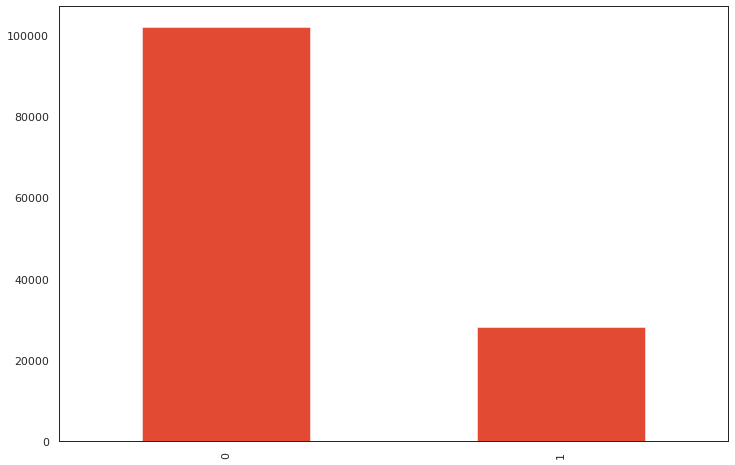

In [507]:
# 1:5 ratio. 1 - represents patients with diabetes_mellitus and 0 - without diabetes_mellitus 
train_set_copy['diabetes_mellitus'].value_counts().plot.bar()

In [101]:
# Lest check class balance 
width = 0.25
plt.bar(type_table['column type'], type_table['counts'], width);
# Add labels and title
plt.title("Data type in set")
plt.xlabel("types")
plt.ylabel("Count")
plt.xticks(rotation=45)  


In [508]:
# 1st way (Lazy way), we will fill missing cells with 0 for int/float data type, but also drop cols with  50% > misses 
# Dropping from train and test sets 
for data_set in both_sets:
    data_set.drop(cols_to_drop_test, axis = 1, inplace=True)

In [509]:
len(list(train_set_copy.columns)), len(list(test_set_copy.columns))

(103, 102)

In [510]:
type_table = pd.DataFrame(columns = ['Feature', 'column type'])
inx = 0
for col_name in train_set_copy.columns:
    type_table.loc[inx, 'Feature'] = col_name
    type_table.loc[inx, 'column type'] = str(train_set_copy[col_name].dtype)
    inx += 1

In [511]:
type_table['counts'] = type_table.groupby(['column type'])['column type'].transform('count')

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

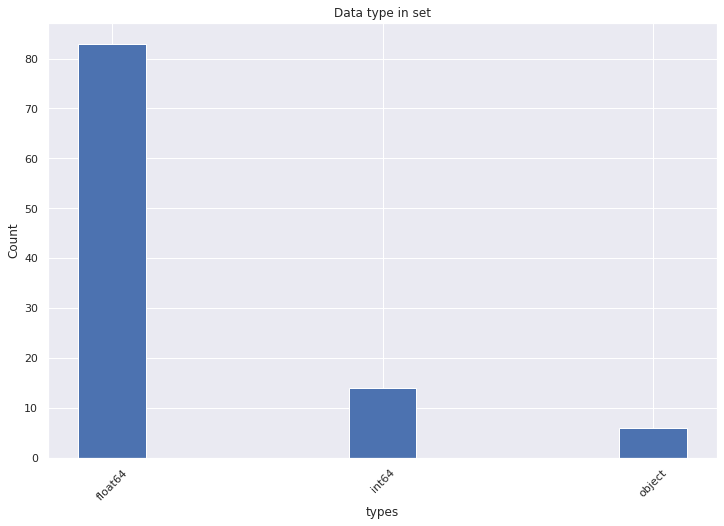

In [129]:
width = 0.25
plt.bar(type_table['column type'], type_table['counts'], width);
# Add labels and title
plt.title("Data type in set")
plt.xlabel("types")
plt.ylabel("Count")
plt.xticks(rotation=45)  


In [512]:
# Mostly numerical type (int, float) and less than 10 cats 

In [513]:
train_set_copy.columns[train_set_copy.dtypes == 'object'] 

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type'],
      dtype='object')

In [514]:
# lets get differernt type (cat, int, float) cols, for analysis and data viz
cat_cols = list(train_set_copy.columns[train_set_copy.dtypes == 'object'])

numerical_cols = list(train_set_copy.columns[(train_set_copy.dtypes == 'float64') |  (train_set_copy.dtypes == 'int64')])


In [ ]:
cat_cols , numerical_cols

In [520]:
# Lets check gender or ethnicity features
cat_cols

['ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type']

In [521]:
gender_df = train_set_copy[['gender']]
gender_df['count'] = gender_df.groupby(['gender'])['gender'].transform('count')
gender_df = gender_df.dropna()

In [522]:
# 66 vals missing, dropping in order to plot it
gender_df['gender'].isna().sum()

0

In [ ]:
width = 0.25
plt.bar(gender_df['gender'], gender_df['count'], width);
# Add labels and title
plt.title("Data type in set")
plt.xlabel("types")
plt.ylabel("Count")
plt.xticks(rotation=45)  

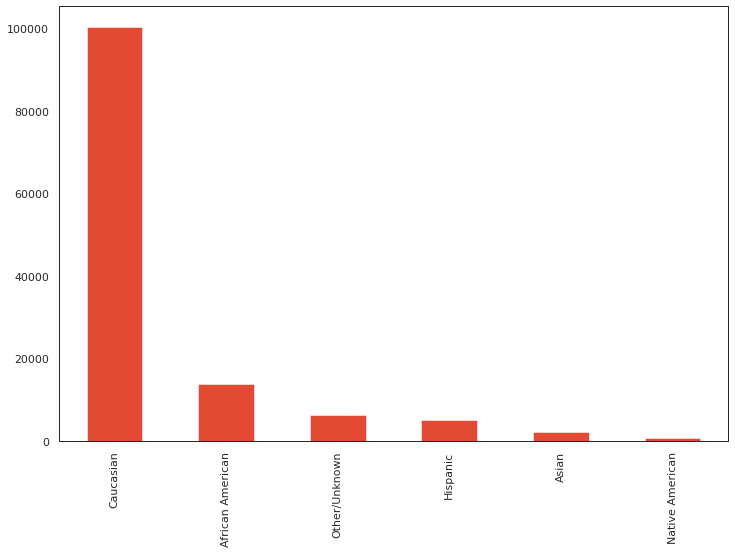

In [524]:
# Caucasians are predominantly represented in this data set 
ethnicity_df = train_set_copy['ethnicity']
ethnicity_df.value_counts().plot.bar()

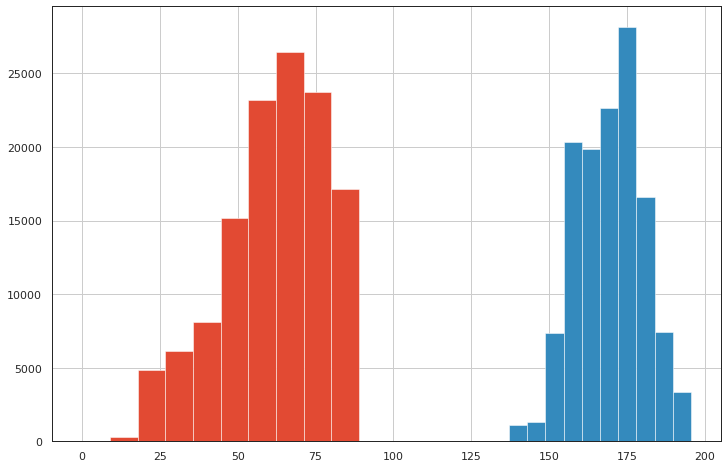

In [525]:
train_set_copy['age' ].hist()
train_set_copy['height'].hist()


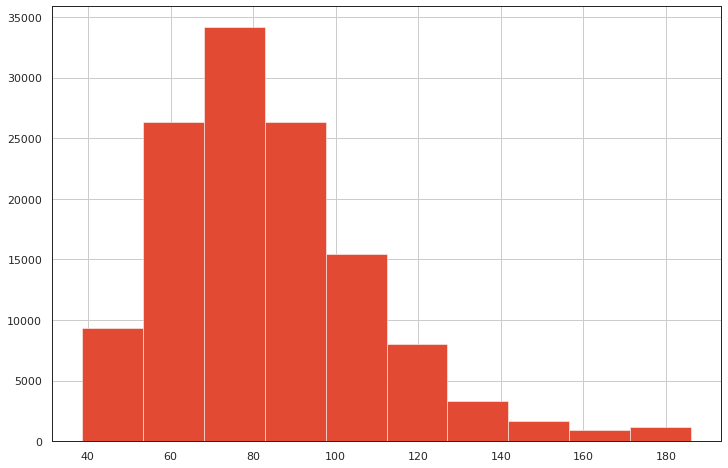

In [526]:
train_set_copy['weight'].hist()

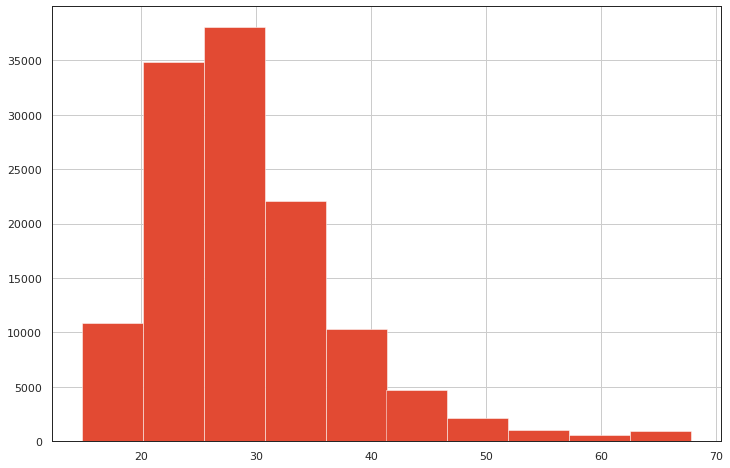

In [527]:
train_set_copy['bmi'].hist()

In [251]:
t =  miss_table(train_set_copy)

In [ ]:
t.sort_values(by='% of missing vals', ascending=False)

In [ ]:
# Now lazy method (just to check fast were we would be), we just fill with blanks for cat vars

In [528]:
train_set_copy['age'].isna().sum()

4988

In [ ]:
cat_cols , numerical_cols

In [530]:
# Remove target label 
numerical_cols.remove('diabetes_mellitus') 

In [531]:
# Fill with blank and treat them as another category 
train_set_copy[cat_cols] = train_set_copy[cat_cols].fillna("")
test_set_copy[cat_cols] = test_set_copy[cat_cols].fillna("")

In [281]:
# train_set_copy[numerical_cols] = train_set_copy[numerical_cols].fillna(value=0)
# test_set_copy[numerical_cols] = test_set_copy[numerical_cols].fillna(value=0)

In [ ]:
train_set_copy.isna().sum(), test_set_copy.isna().sum()

In [533]:
train_set_copy.head(3)

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,...,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,admit,CTICU,0.541667,0,73.9,113.0,502.01,0,0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,36.0,134.0,39.3,0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,...,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0,0,0,0,0,0,0,1
1,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,admit,Med-Surg ICU,0.927778,0,70.2,108.0,203.01,0,0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,33.0,145.0,35.1,1,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,...,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0,0,0,0,0,0,0,1
2,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,0.000694,0,95.3,122.0,703.03,0,0,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0,68.0,37.0,NaN,36.7,0,NaN,88.0,48.0,88.0,48.0,96.0,68.0,102.0,...,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,36.7,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0


In [656]:
# Encode features

df_tr = train_set_copy.copy()
df_tr.isna().sum()
df_te = test_set_copy.copy()



In [657]:
# Keep target label
train_Y = df_tr['diabetes_mellitus']
train_Y.shape

(130157,)

In [658]:
df_tr.drop(['diabetes_mellitus'], axis=1, inplace=True)

In [659]:
df_tr.shape, df_te.shape, cat_cols

((130157, 102),
 (10234, 102),
 ['ethnicity',
  'gender',
  'hospital_admit_source',
  'icu_admit_source',
  'icu_stay_type',
  'icu_type'])

In [660]:
both_df = pd.concat([df_tr, df_te])

In [661]:
both_df.shape

(140391, 102)

In [662]:
both_df = pd.get_dummies(both_df, prefix=cat_cols)


In [663]:
both_df.head(5)

,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,...,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_,gender_F,gender_M,hospital_admit_source_,hospital_admit_source_Acute Care/Floor,hospital_admit_source_Chest Pain Center,hospital_admit_source_Direct Admit,hospital_admit_source_Emergency Department,hospital_admit_source_Floor,hospital_admit_source_ICU,hospital_admit_source_ICU to SDU,hospital_admit_source_Observation,hospital_admit_source_Operating Room,hospital_admit_source_Other,hospital_admit_source_Other Hospital,hospital_admit_source_Other ICU,hospital_admit_source_PACU,hospital_admit_source_Recovery Room,hospital_admit_source_Step-Down Unit (SDU),icu_admit_source_,icu_admit_source_Accident & Emergency,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,68.0,22.732803,0,180.3,0.541667,0,73.9,113.0,502.01,0,0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,36.0,134.0,39.3,0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,77.0,27.421875,0,160.0,0.927778,0,70.2,108.0,203.01,0,0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,33.0,145.0,35.1,1,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,...,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,25.0,31.952749,0,172.7,0.000694,0,95.3,122.0,703.03,0,0,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0,68.0,37.0,NaN,36.7,0,NaN,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,...,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,81.0,22.635548,1,165.1,0.000694,0,61.7,203.0,1206.03,1,0,NaN,NaN,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,4.0,NaN,34.8,1,8.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
4,19.0,NaN,0,188.0,0.073611,0,NaN,119.0,601.01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0,103.0,16.0,NaN,36.7,0,NaN,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,...,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [664]:
df_tr = both_df.iloc[:130157,:] 
df_te = both_df.iloc[130158:,:] 

In [665]:
df_tr.shape, df_te.shape

((130157, 139), (10233, 139))

In [666]:
# Age -> median fills NA and Zeros 
df_tr['age'].fillna(value=df_tr['age'].median(), inplace=True)
df_te['age'].fillna(value=df_te['age'].median(), inplace=True)
df_tr['age'].replace(0, df_tr['age'].median(), inplace=True)
df_te['age'].replace(0, df_te['age'].median(), inplace=True)
df_tr['age'] = pd.cut(df_tr['age'], 5, labels=[1,2,3,4,5])
df_te['age'] = pd.cut(df_te['age'], 5, labels=[1,2,3,4,5])


In [667]:
# Bmi - mean 
df_tr['bmi'].fillna(value=df_tr['bmi'].mean(), inplace=True)
df_te['bmi'].fillna(value=df_te['bmi'].mean(), inplace=True)
df_tr['bmi'] = pd.qcut(df_tr['bmi'], 5, labels=[1,2,3,4,5])
df_te['bmi'] = pd.qcut(df_te['bmi'], 5, labels=[1,2,3,4,5])

In [668]:
# height - mean 
df_tr['height'].fillna(value=df_tr['height'].mean(), inplace=True)
df_te['height'].fillna(value=df_te['height'].mean(), inplace=True)

df_tr['height'] = pd.qcut(df_tr['height'], 5, labels=[1,2,3,4,5])
df_te['height'] = pd.qcut(df_te['height'], 5, labels=[1,2,3,4,5])

In [669]:
# weight - mean 
df_tr['weight'].fillna(value=df_tr['weight'].mean(), inplace=True)
df_te['weight'].fillna(value=df_te['weight'].mean(), inplace=True)

df_tr['weight'] = pd.qcut(df_tr['weight'], 5, labels=[1,2,3,4,5])
df_te['weight'] = pd.qcut(df_te['weight'], 5, labels=[1,2,3,4,5])

In [670]:
# outliers looks ok 
df_te['pre_icu_los_days'] = pd.qcut(df_te['pre_icu_los_days'], 35, labels=[x+1 for x in range(35)])
df_tr['pre_icu_los_days'] = pd.qcut(df_tr['pre_icu_los_days'], 35, labels=[x+1 for x in range(35)])

In [671]:
# bun_apache - median 
df_tr['bun_apache'].fillna(value=df_tr['bun_apache'].median(), inplace=True)
df_te['bun_apache'].fillna(value=df_te['bun_apache'].median(), inplace=True)

In [675]:
df_tr['bun_apache'] = pd.qcut(df_tr['bun_apache'], 4, labels=[1,2,3,4])
df_te['bun_apache'] = pd.qcut(df_te['bun_apache'], 4, labels=[1,2,3,4])

In [686]:
# creatinine_apache - median 
df_tr['creatinine_apache'].fillna(value=df_tr['creatinine_apache'].median(), inplace=True)
df_te['creatinine_apache'].fillna(value=df_te['creatinine_apache'].median(), inplace=True)

In [689]:
df_tr['creatinine_apache'] = pd.qcut(df_tr['creatinine_apache'], 4, labels=[1,2,3,4])
df_te['creatinine_apache'] = pd.qcut(df_te['creatinine_apache'], 4, labels=[1,2,3,4])

In [696]:
# df_tr['apache_2_diagnosis'].isna().sum(), df_te['apache_2_diagnosis'].isna().sum()


# df_tr['creatinine_apache'].unique()
# df_tr['apache_2_diagnosis'].hist(bins=10)
# df_te['apache_2_diagnosis'].hist()

df_tr['apache_2_diagnosis'].describe(), df_te['apache_2_diagnosis'].describe() 


# df_tr['height'][df_tr['height'] == 20]

(count    128472.000000
 mean        185.492683
 std          85.858208
 min         101.000000
 25%         113.000000
 50%         122.000000
 75%         301.000000
 max         308.000000
 Name: apache_2_diagnosis, dtype: float64, count    10063.000000
 mean       187.969194
 std         86.066870
 min        101.000000
 25%        113.000000
 50%        123.000000
 75%        302.000000
 max        308.000000
 Name: apache_2_diagnosis, dtype: float64)

In [690]:
df_tr.head(5)

,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,...,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_,gender_F,gender_M,hospital_admit_source_,hospital_admit_source_Acute Care/Floor,hospital_admit_source_Chest Pain Center,hospital_admit_source_Direct Admit,hospital_admit_source_Emergency Department,hospital_admit_source_Floor,hospital_admit_source_ICU,hospital_admit_source_ICU to SDU,hospital_admit_source_Observation,hospital_admit_source_Operating Room,hospital_admit_source_Other,hospital_admit_source_Other Hospital,hospital_admit_source_Other ICU,hospital_admit_source_PACU,hospital_admit_source_Recovery Room,hospital_admit_source_Step-Down Unit (SDU),icu_admit_source_,icu_admit_source_Accident & Emergency,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,4,1,0,5,28,0,2,113.0,502.01,0,0,4,4,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,36.0,134.0,39.3,0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,5,3,0,1,30,0,2,108.0,203.01,0,0,1,1,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,33.0,145.0,35.1,1,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,...,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1,4,0,3,2,0,4,122.0,703.03,0,0,2,2,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0,68.0,37.0,NaN,36.7,0,NaN,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,...,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,5,1,1,2,2,0,1,203.0,1206.03,1,0,2,2,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,4.0,NaN,34.8,1,8.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
4,1,3,0,5,12,0,3,119.0,601.01,0,0,2,2,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0,103.0,16.0,NaN,36.7,0,NaN,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,...,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [488]:
df_tr['apache_2_diagnosis'].describe()


# train_set['apache_2_diagnosis'].describe()

count    130157.000000
mean        183.091313
std          87.840038
min           0.000000
25%         113.000000
50%         122.000000
75%         301.000000
max         308.000000
Name: apache_2_diagnosis, dtype: float64

In [485]:
df_tr.tail(5)

,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,...,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_,gender_F,gender_M,hospital_admit_source_,hospital_admit_source_Acute Care/Floor,hospital_admit_source_Chest Pain Center,hospital_admit_source_Direct Admit,hospital_admit_source_Emergency Department,hospital_admit_source_Floor,hospital_admit_source_ICU,hospital_admit_source_ICU to SDU,hospital_admit_source_Observation,hospital_admit_source_Operating Room,hospital_admit_source_Other,hospital_admit_source_Other Hospital,hospital_admit_source_Other ICU,hospital_admit_source_PACU,hospital_admit_source_Recovery Room,hospital_admit_source_Step-Down Unit (SDU),icu_admit_source_,icu_admit_source_Accident & Emergency,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
130152,3,4,0,4,8,0,4,110.0,104.01,0,0,0.0,0.00,4.0,6.0,0.0,5.0,0.0,106.0,0.0,0,120.0,50.0,0.0,36.2,0,0.0,102.0,82.0,102.0,82.0,101.0,89.0,120.0,104.0,120.0,104.0,40.0,12.0,97.0,...,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
130153,5,4,0,2,6,0,3,105.0,207.01,0,0,32.0,1.07,4.0,6.0,0.0,4.0,139.0,112.0,39.0,0,125.0,42.0,140.0,36.4,0,9.5,97.0,63.0,97.0,63.0,101.0,78.0,125.0,79.0,125.0,79.0,37.0,20.0,97.0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
130154,5,4,0,4,20,0,5,114.0,102.01,0,0,30.0,2.43,1.0,1.0,0.0,1.0,346.0,104.0,0.0,1,58.0,34.0,142.0,32.9,1,0.0,82.0,60.0,82.0,60.0,101.0,58.0,110.0,83.0,110.0,83.0,34.0,12.0,100.0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
130155,5,2,0,5,22,0,3,124.0,306.01,0,0,0.0,0.00,4.0,6.0,0.0,5.0,137.0,83.0,32.0,0,60.0,31.0,0.0,35.5,0,0.0,80.0,44.0,80.0,44.0,110.0,70.0,97.0,54.0,97.0,54.0,31.0,8.0,100.0,...,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
130156,2,4,0,5,14,0,5,105.0,207.01,0,0,0.0,0.00,4.0,6.0,0.0,5.0,0.0,97.0,0.0,0,118.0,57.0,0.0,37.1,0,0.0,91.0,75.0,91.0,75.0,97.0,71.0,106.0,91.0,106.0,91.0,35.0,13.0,100.0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
